In [1]:
#Importing the necessary libraries-->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and checking the first five rows-->

df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking the general information-->

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Checking the statistical values-->

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Exploration:-

### 1- Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value-

In [5]:
#Taking the columns where 0 indicates missing value-->

cols =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols]=df[cols].replace(0, np.nan)

In [6]:
#Checking for the null value percentage-->

(df.isnull().sum()/len(df))*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [7]:
#Dropping the null values from these columns 'Glucose', 'BMI' & 'BloodPressure'-->

df.dropna(subset=['Glucose','BMI','BloodPressure'], inplace=True)

In [8]:
#Validating our task-->

df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
#Filling the missing values in 'SkinThickness' & 'Insulin'-->

df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2 - Visually explore these variables using histograms:

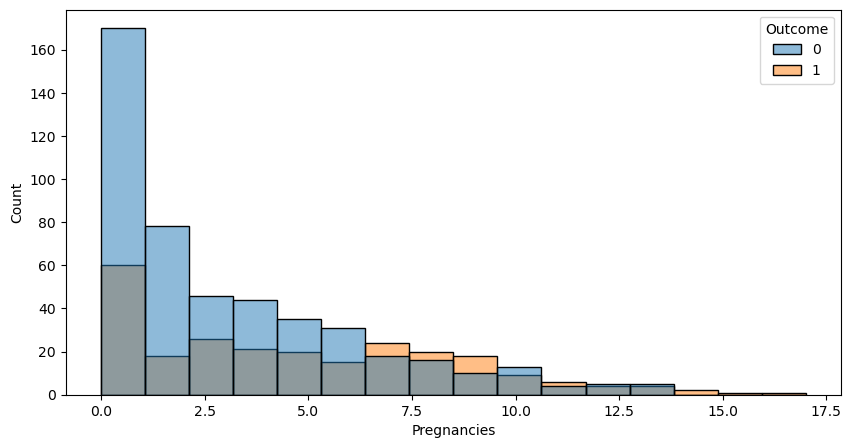

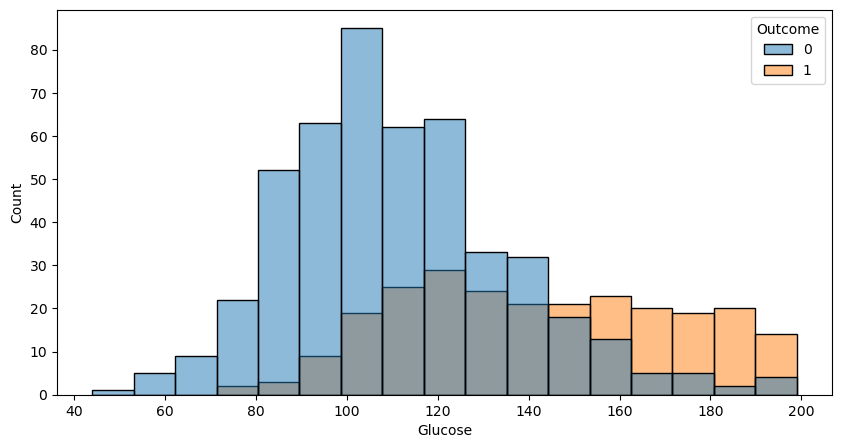

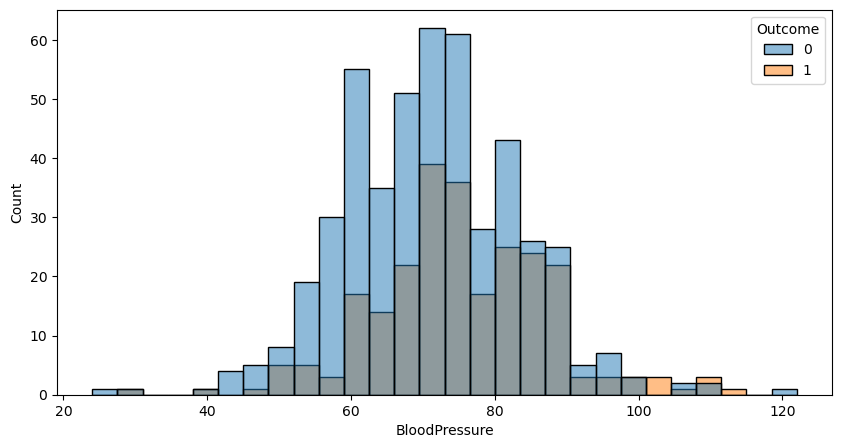

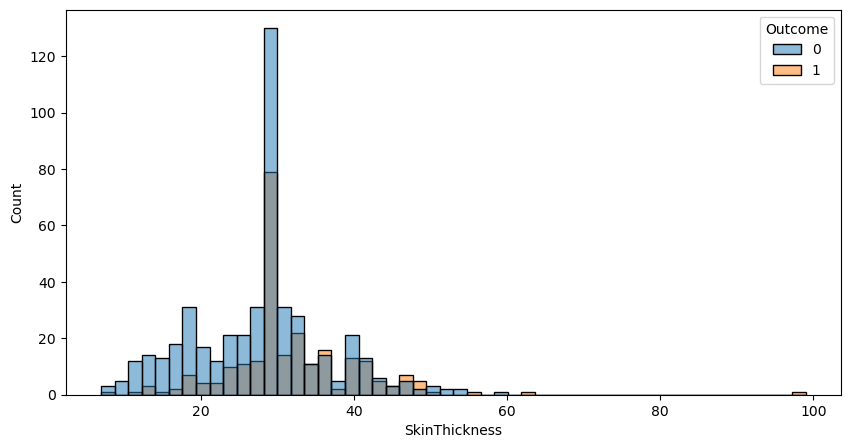

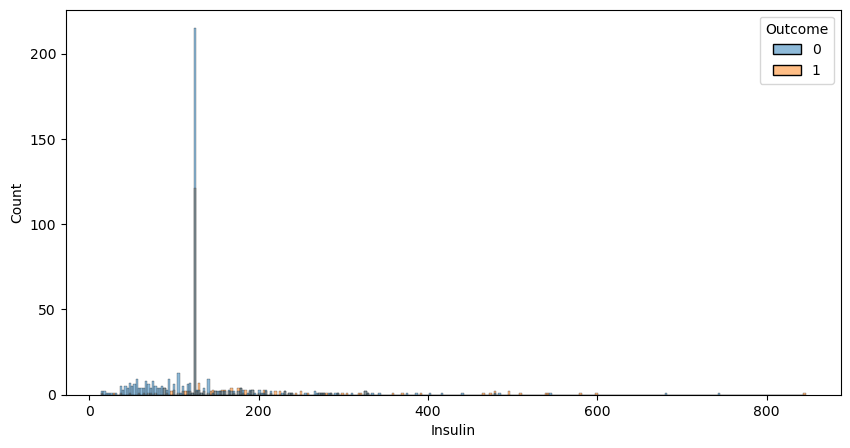

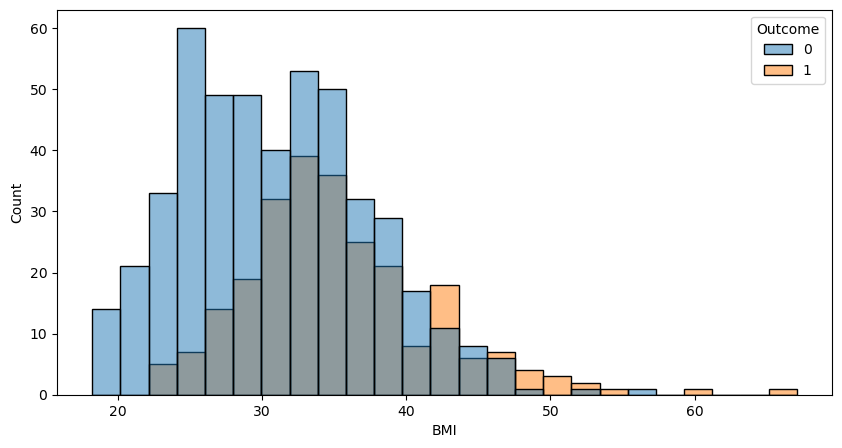

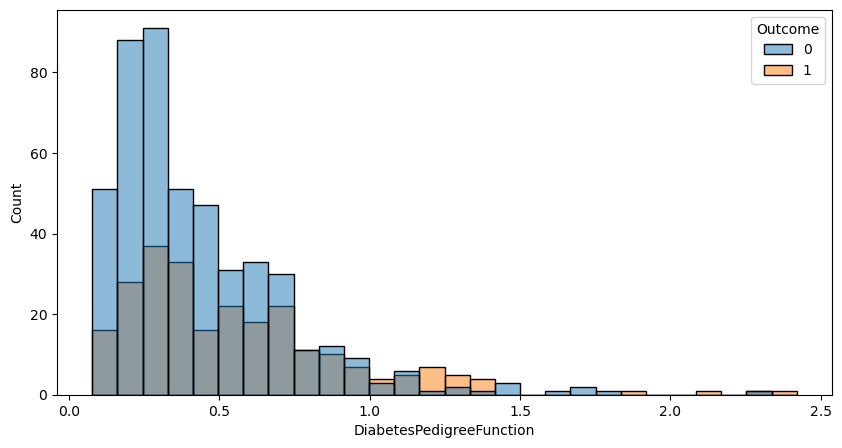

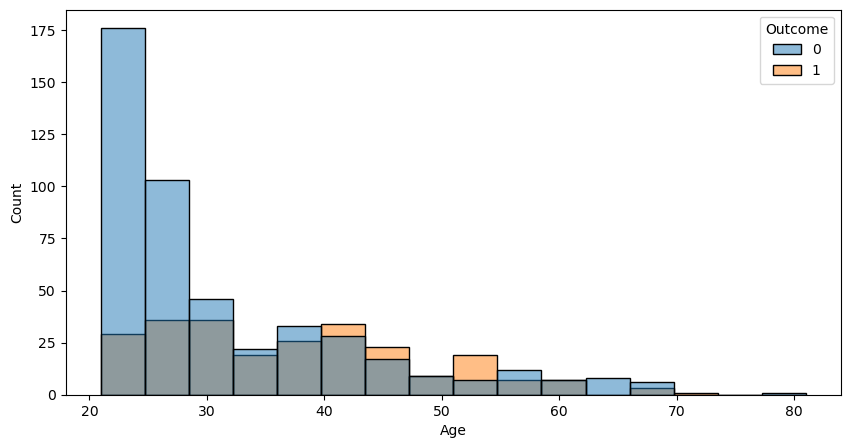

In [11]:
#Creating a histogram for each of the Feature set by keeping 'Dependent variable' as a Hue parameter-->

for i in df.columns[:-1]:
    plt.figure(figsize=(10,5))
    sns.histplot(x=i, data=df, hue='Outcome')
    plt.show()

### 3 - There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables:

In [12]:
#Checking the dtypes of each column in our dataset-->

a=pd.DataFrame(df.dtypes)
a

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


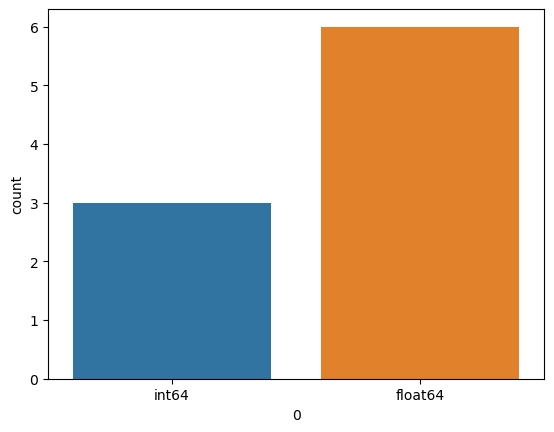

In [13]:
#Creating a Countplot for dtypes-->

sns.countplot(x=0, data=a)
plt.show()

### 4 - Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:

In [14]:
#Using value_counts() to check the balance in our Dependent variable-->

df['Outcome'].value_counts(normalize=True)*100

0    65.607735
1    34.392265
Name: Outcome, dtype: float64

### 5 - Create scatter charts between the pair of variables to understand the relationships. Describe your findings:

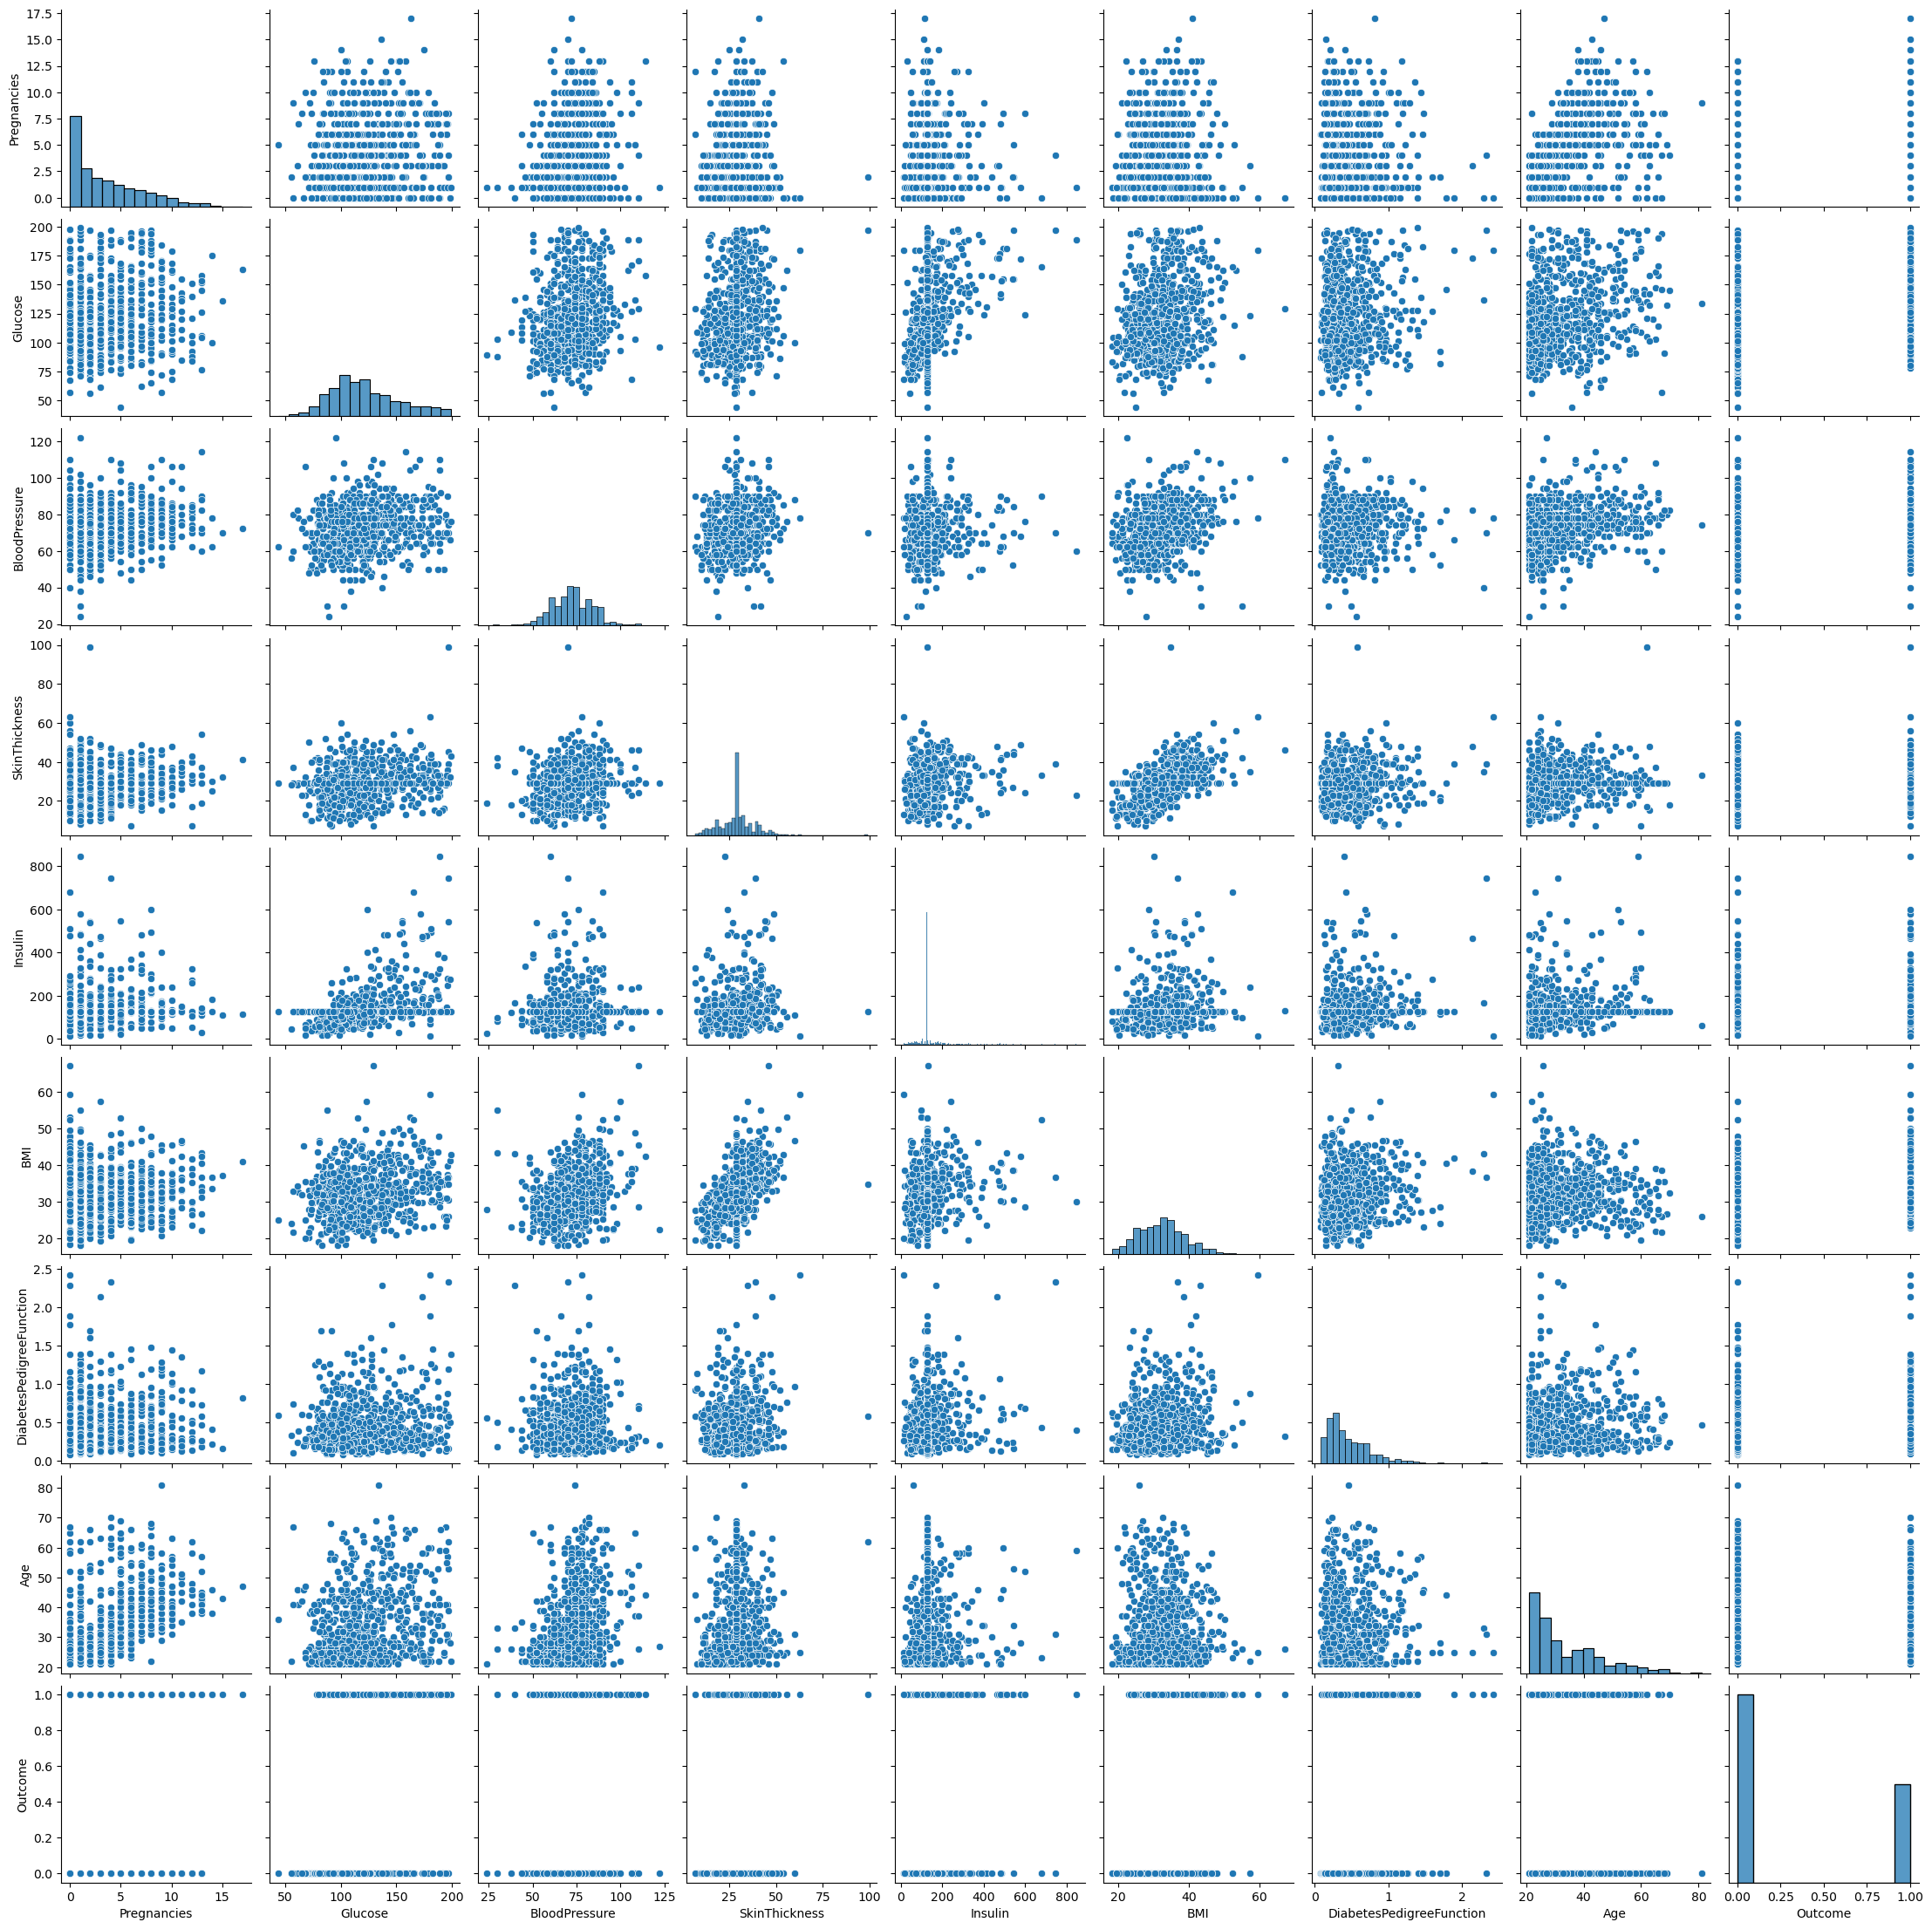

In [15]:
#Creating a Pairplot-->

sns.pairplot(df)
plt.show()

### 6 - Perform correlation analysis. Visually explore it using a heat map:

In [16]:
#Using the corr() function to check the correlation of the variable-->

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.078710,0.023269,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195340,0.427117,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.191570,0.045832,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.078710,0.195340,0.191570,1.000000,0.154145,0.555098,0.106670,0.124268,0.216357
Insulin,0.023269,0.427117,0.045832,0.154145,1.000000,0.184102,0.129494,0.096894,0.211736
BMI,0.012342,0.223276,0.287403,0.555098,0.184102,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.106670,0.129494,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.124268,0.096894,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216357,0.211736,0.299375,0.184947,0.245741,1.000000


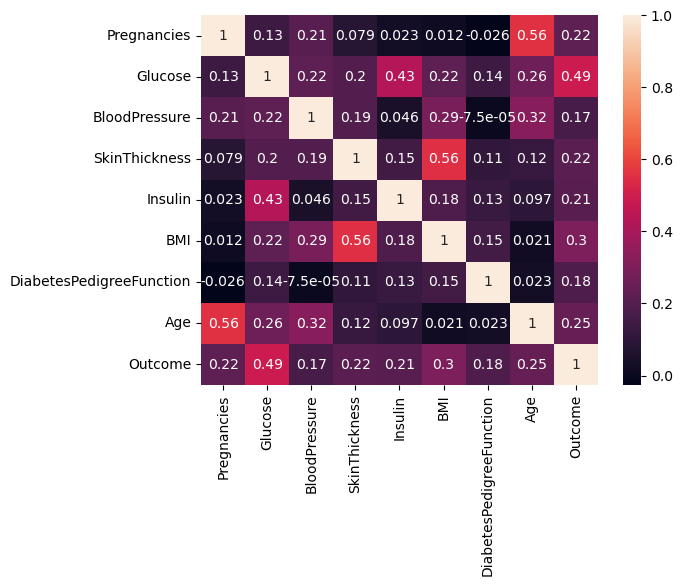

In [17]:
#Creating a Heatmap using the heatmap function from Seaborn package-->

sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Modeling:-

### 1 - Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:

In [18]:
#Splitting our dataset into Feature & Dependent Variable set-->

x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [19]:
#Applying train test split method-->

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3, random_state=222)

### Logistic Regression Model-->

In [20]:
#Applying and Fitting the Logistic Regression Model-->

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [21]:
#Making predictions-->

y_pred=log.predict(x_test)

In [22]:
#Importing metrics to check the accuracy-->

from sklearn.metrics import classification_report, confusion_matrix

In [23]:
log_report=classification_report(y_test, y_pred)
print('log_report-','\n', log_report)
log_conf=confusion_matrix(y_test, y_pred)
print('log_conf-','\n', log_conf)

log_report- 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       134
           1       0.76      0.50      0.60        84

    accuracy                           0.75       218
   macro avg       0.75      0.70      0.71       218
weighted avg       0.75      0.75      0.73       218

log_conf- 
 [[121  13]
 [ 42  42]]


### Random Forest Classifier-->

In [24]:
#Applying and Fitting the Random Forest Classifier-->

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [25]:
#Making Predictions-->

y_pred=rfc.predict(x_test)

In [26]:
#Checking the accuracy-->

rfc_report=classification_report(y_test, y_pred)
print('rfc_report-','\n', rfc_report)
rfc_conf=confusion_matrix(y_test, y_pred)
print('rfc_conf-','\n', rfc_conf)

rfc_report- 
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       134
           1       0.75      0.54      0.63        84

    accuracy                           0.75       218
   macro avg       0.75      0.71      0.72       218
weighted avg       0.75      0.75      0.74       218

rfc_conf- 
 [[119  15]
 [ 39  45]]


### Support Vector Classifier-->

In [27]:
#Applying and Fitting the Support Vector Classifier Model-->

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [28]:
#Making predictions-->

y_pred=svc.predict(x_test)

In [29]:
#Checking the accuracy-->

svc_report=classification_report(y_test, y_pred)
print('svc_report-','\n', svc_report)
svc_conf=confusion_matrix(y_test, y_pred)
print('svc_conf-','\n', svc_conf)

svc_report- 
               precision    recall  f1-score   support

           0       0.73      0.92      0.81       134
           1       0.78      0.45      0.57        84

    accuracy                           0.74       218
   macro avg       0.75      0.69      0.69       218
weighted avg       0.75      0.74      0.72       218

svc_conf- 
 [[123  11]
 [ 46  38]]


### KNearestNeighbors Model-->

In [30]:
#Applying and Fitting the KNearestNeighbors Model-->

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
#Making Predictions-->

y_pred=knn.predict(x_test)

In [32]:
#Checking the accuracy of the model-->

knn_report=classification_report(y_test, y_pred)
print('knn_report-','\n', knn_report)
knn_conf=confusion_matrix(y_test, y_pred)
print('knn_conf-','\n', knn_conf)

knn_report- 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       134
           1       0.72      0.46      0.57        84

    accuracy                           0.72       218
   macro avg       0.72      0.68      0.68       218
weighted avg       0.72      0.72      0.71       218

knn_conf- 
 [[119  15]
 [ 45  39]]


In [33]:
#Out of all the models, Random Forest Classifier gives the highest accuracy of 76%.